# Simulación del Modelo de Ising 2D con Monte Carlo

Este notebook implementa una simulación del **modelo de Ising** en dos dimensiones
utilizando el **algoritmo de Metropolis**.

El modelo de Ising es un sistema en mecánica estadística que describe 
espines en una red, donde cada espín puede tomar valores +1 o -1 e interactúa 
con sus vecinos más cercanos. Este modelo es famoso por mostrar una 
**transición de fase** a una temperatura crítica.

**Objetivos:**
- Implementar el algoritmo de Metropolis en Python.
- Simular una red cuadrada 2D de espines.
- Calcular magnitudes físicas (energía, magnetización, calor específico, susceptibilidad).
- Visualizar configuraciones de espines y resultados.

Autor: **Tomás Aubin**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
L = 20              # tamaño de la red (LxL)
N = L*L             # número de espines
kB = 1.0            # constante de Boltzmann
J = 1.0             # interacción de acoplamiento


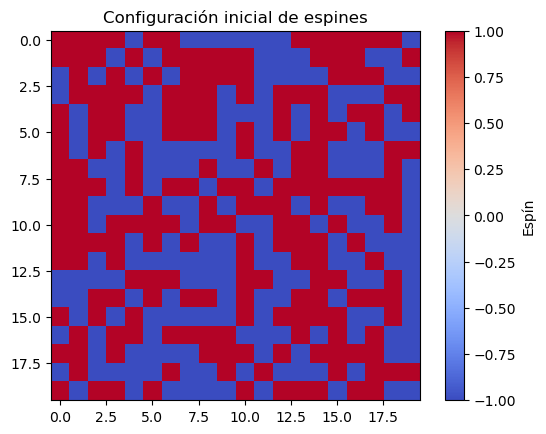

In [2]:
def inicializar_red(L, estado="random"):
    if estado == "random":
        return np.random.choice([-1, 1], size=(L, L))
    elif estado == "up":
        return np.ones((L, L), dtype=int)
    elif estado == "down":
        return -np.ones((L, L), dtype=int)

# Ejemplo: red inicial
red = inicializar_red(L, "random")
plt.imshow(red, cmap="coolwarm")
plt.title("Configuración inicial de espines")
plt.colorbar(label="Espín")
plt.show()


## Algoritmo de Metropolis

El algoritmo acepta o rechaza cambios de espín con probabilidad:

$$
P = \min\{1, \exp(-\Delta E / k_B T)\}
$$

donde $\Delta E$ es el cambio de energía al voltear un espín.


In [3]:
def energia_local(red, i, j, J):
    L = red.shape[0]
    s = red[i, j]
    # vecinos con condiciones periódicas
    vecinos = red[(i+1)%L, j] + red[(i-1)%L, j] + red[i, (j+1)%L] + red[i, (j-1)%L]
    return -J * s * vecinos

def metropolis(red, T, J=1.0, pasos=1000):
    L = red.shape[0]
    for _ in range(pasos):
        i, j = np.random.randint(0, L), np.random.randint(0, L)
        dE = -2 * energia_local(red, i, j, J)
        if dE < 0 or np.random.rand() < np.exp(-dE / (kB*T)):
            red[i, j] *= -1
    return red


In [ ]:
#Medición de observables

def energia_total(red, J=1.0):
    L = red.shape[0]
    E = 0
    for i in range(L):
        for j in range(L):
            S = red[i,j]
            vecinos = red[(i+1)%L, j] + red[i, (j+1)%L]
            E += -J * S * vecinos
    return E

def magnetizacion(red):
    return np.sum(red)


In [5]:
#Simulación de temperaturas

def simular(L=20, T=2.0, pasos=10000, eq=1000):
    red = inicializar_red(L, "random")
    E, M = [], []
    for step in range(pasos):
        metropolis(red, T, pasos=L*L)
        if step >= eq:
            E.append(energia_total(red))
            M.append(magnetizacion(red))
    return np.mean(E)/N, np.mean(M)/N, np.var(E)/(kB*T**2*N), np.var(M)/(kB*T*N)


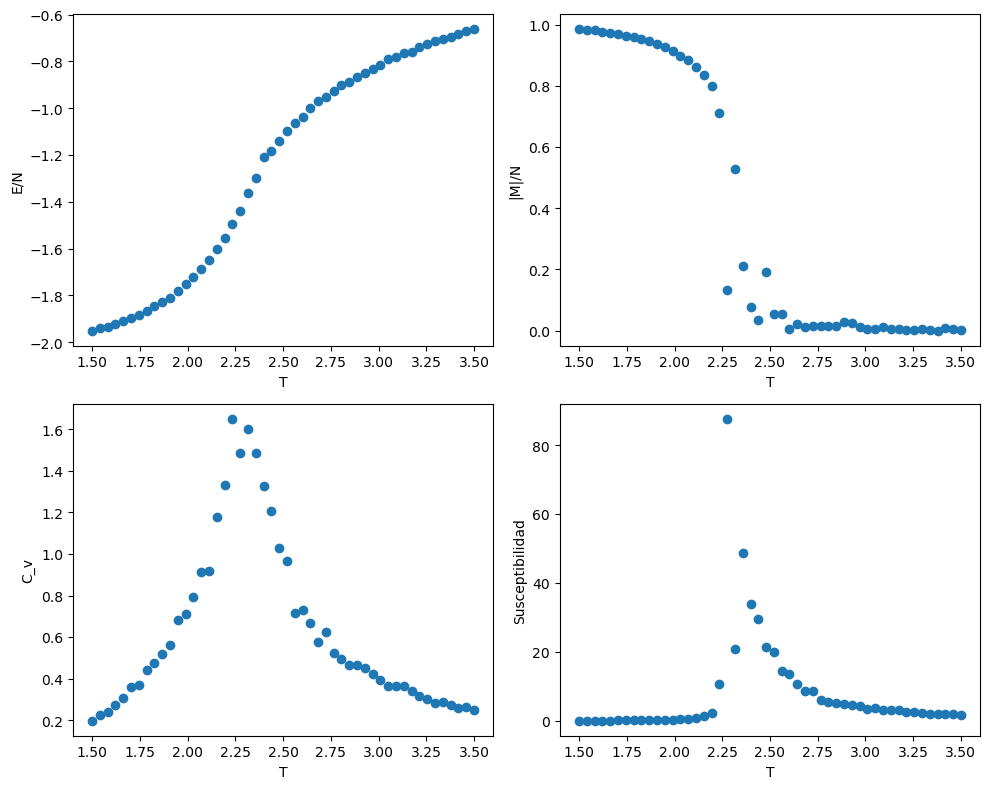

In [ ]:
#Resultados (simulación de 50 temperaturas distintas. Tarda en correr unos 15 minutos)

temperaturas = np.linspace(1.5, 3.5, 50) #al testear, cambiar la cantidad de temperaturas de 50 a 10
energia_vals, mag_vals, Cv_vals, chi_vals = [], [], [], []

for T in temperaturas:
    E, M, Cv, chi = simular(L=20, T=T, pasos=5000, eq=1000) #al cambiar el tamaño de la red también tarda mas en simular.
    energia_vals.append(E)
    mag_vals.append(abs(M))
    Cv_vals.append(Cv)
    chi_vals.append(chi)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(temperaturas, energia_vals, 'o'); plt.xlabel("T"); plt.ylabel("E/N")

plt.subplot(2,2,2)
plt.plot(temperaturas, mag_vals, 'o'); plt.xlabel("T"); plt.ylabel("|M|/N")

plt.subplot(2,2,3)
plt.plot(temperaturas, Cv_vals, 'o'); plt.xlabel("T"); plt.ylabel("C_v")

plt.subplot(2,2,4)
plt.plot(temperaturas, chi_vals, 'o'); plt.xlabel("T"); plt.ylabel("Susceptibilidad")

plt.tight_layout()
plt.show()


## Conclusiones

- El modelo de Ising 2D presenta una **transición de fase** alrededor de 
  $T_c \approx 2.27 J/k_B$, observable en el salto de la magnetización 
  y los picos en calor específico y susceptibilidad.

- El algoritmo de **Metropolis Monte Carlo** permite estudiar sistemas 
  estocásticos complejos de forma eficiente.

- Este proyecto muestra cómo métodos numéricos y simulaciones pueden 
  aplicarse al estudio de sistemas físicos y a la caracterización de 
  transiciones de fase.
